# Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file = "C:/Users/guzma/OneDrive/Documents/TEC/S6/MA2007/Reto/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl"
df = pd.read_pickle(file)

## Data Cleaning

In [26]:
# print(df.keys())
df1 = pd.DataFrame(df['flow'])
df1.columns = ['flow']
df2 = pd.DataFrame(df['obs_tas'])
df2.columns = ['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7', 'tas_8']
df3 = pd.DataFrame(df['flow_dates'])
# df4 = pd.DataFrame(df['obs_lon_lat']) # ignore
df5 = pd.DataFrame(df['obs_pr'])
df5.columns = ['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8']
df6 = pd.DataFrame(df['obs_dates'])
df6.columns = ['dates']

In [19]:
data = pd.concat([df1, df2], axis=1, join='inner')
data = pd.concat([data, df5], axis=1, join='inner')

In [20]:
data.index = df3.index

In [28]:
data['obs_dates'] = df6['dates']
data.head()

,flow,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,obs_dates
1958-01-04,1.723781,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1958-01-04
1958-01-05,0.960882,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1958-01-05
1958-01-06,0.001000,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1958-01-06
1958-01-07,0.001000,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1958-01-07
1958-01-08,0.316796,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1958-01-08


## Clustering

Primero estaremos creando dos dataframes. Una tendra nuestra variable objetivo **flow** y la otra tendra las variables predictoras.

In [34]:
X = data.drop(['flow', 'obs_dates'], axis=1)
y = data['flow']

Ahora se tendra que reducir la dimension de nuestras variables predictoras. En este caso, tenemos 18 variables predictoras, lo cual nosotros reduciremos en dimensiones e intentaremos no perder mucho de la explicacion de estos datos al reducir dimensiones.

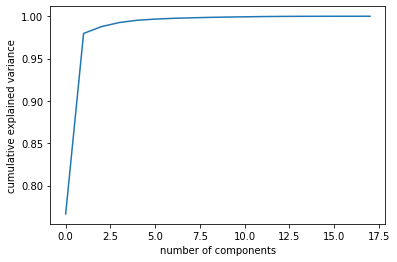

In [35]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Como podemos observar, al utilizar 2 componentes nosotros explicamos alrededor de 98% de los datos.

In [36]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(21542, 18)
(21542, 2)


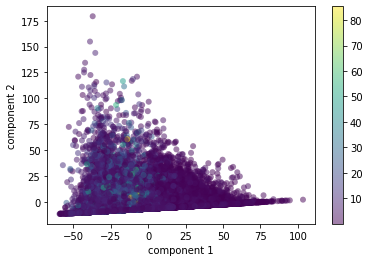

In [48]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [49]:
from sklearn.cluster import KMeans

K = 2 # Choose the number of clusters for KMeans.

# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)

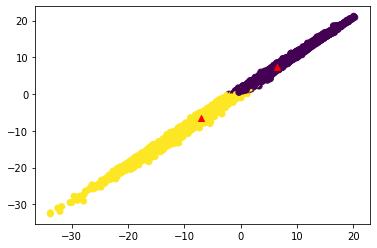

In [56]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()